# **Breast Cancer Prediction**


**Data Set Information:**

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.
The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.
Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.
There's a story behind every dataset and here's your opportunity to share yours.

**Attribute Information:**

Quantitative Attributes:

1. Age (years)
2. BMI (kg/m2)
3. Glucose (mg/dL)
4. Insulin (µU/mL)
5. HOMA
6. Leptin (ng/mL)
7. Adiponectin (µg/mL)
8. Resistin (ng/mL)
9. MCP-1(pg/dL)

Labels:
  1. Healthy controls
  2. Patients

In [1]:
# Import requird Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report

from sklearn.model_selection import train_test_split

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [3]:
#import the Dataset
data = pd.read_csv("dataR2.csv")

In [4]:
# Displaying the first 5 rows of data
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
data.shape

(116, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [8]:
# checking for Missing Values
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

It seems that there are no missing values in our data. Great, let's see the distribution of data:

### **let's see how data is distributed for every column**

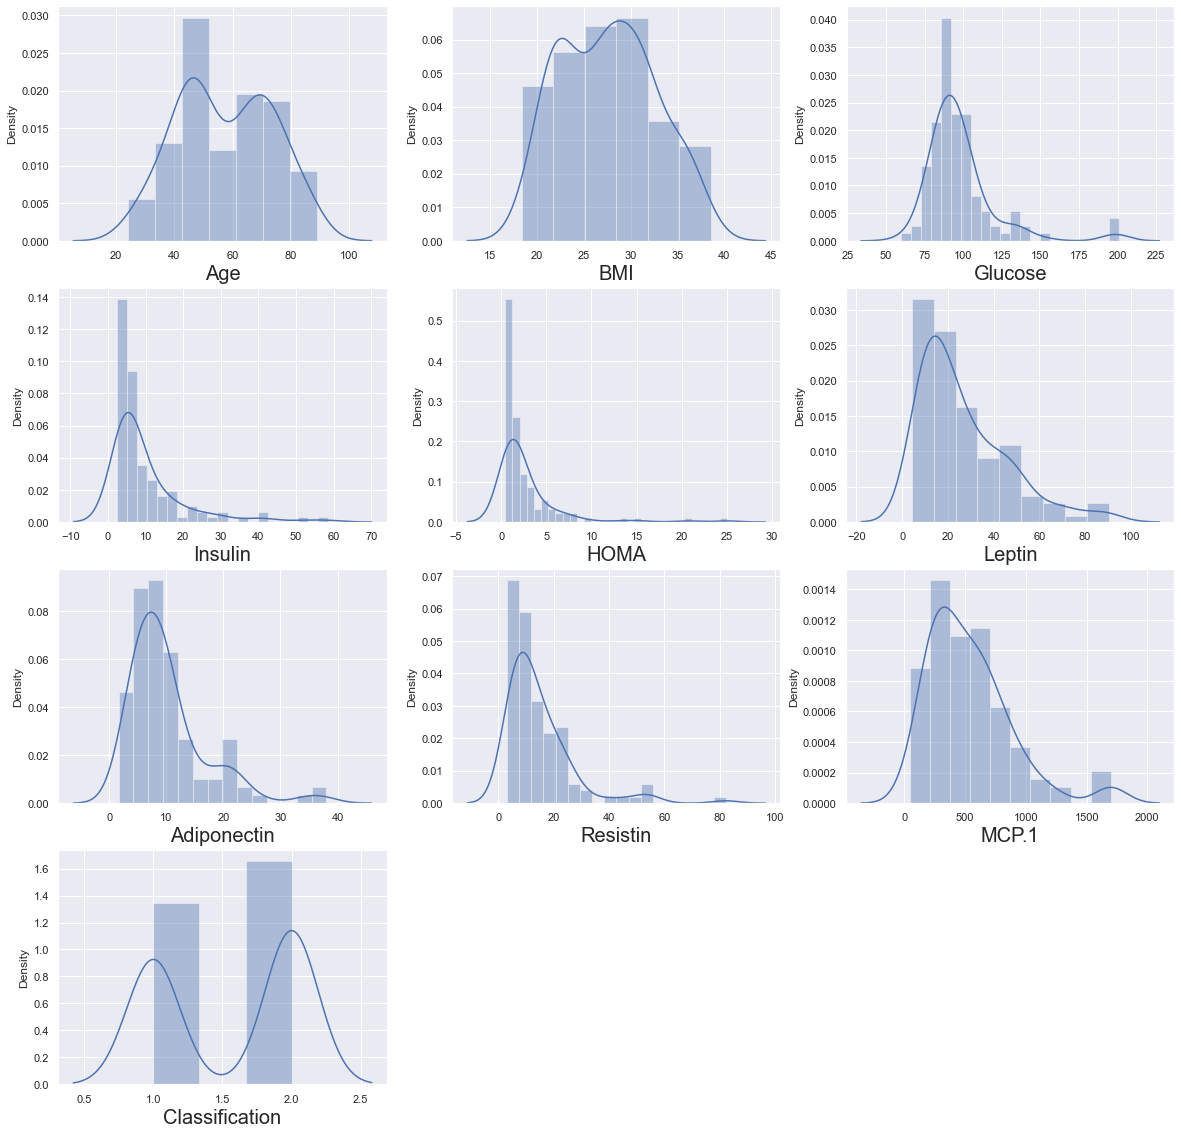

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 :     # as there are 10 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

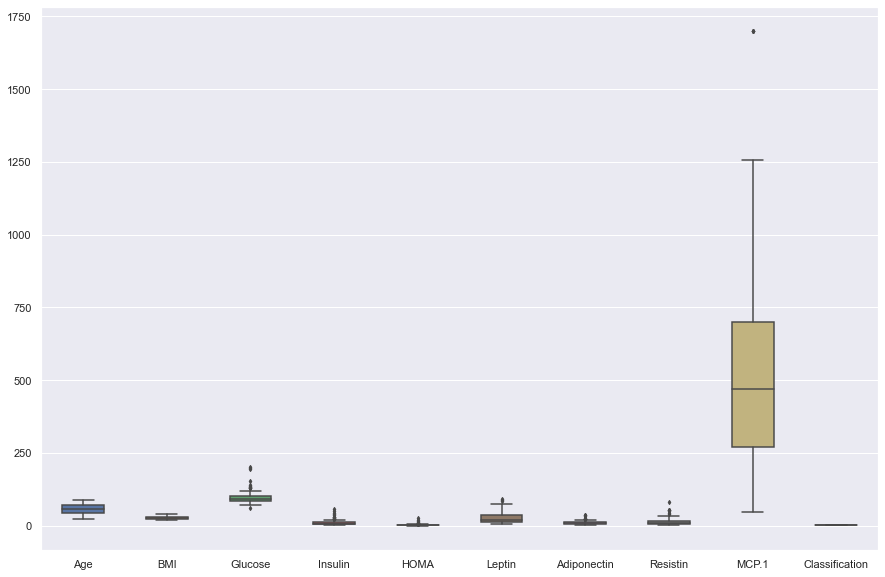

In [10]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

In [11]:
data['MCP.1'] = data['MCP.1'].replace(0,data['MCP.1'].mean())

In [12]:
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [13]:
q = data["MCP.1"].quantile(0.99)
data_cleaned = data[data["MCP.1"] < q]

q = data_cleaned["Glucose"].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned["Glucose"] < q]

q = data_cleaned["Insulin"].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned["Insulin"] < q]

q = data_cleaned["Resistin"].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned["Resistin"] < q]

q = data_cleaned["Adiponectin"].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned["Adiponectin"] < q]

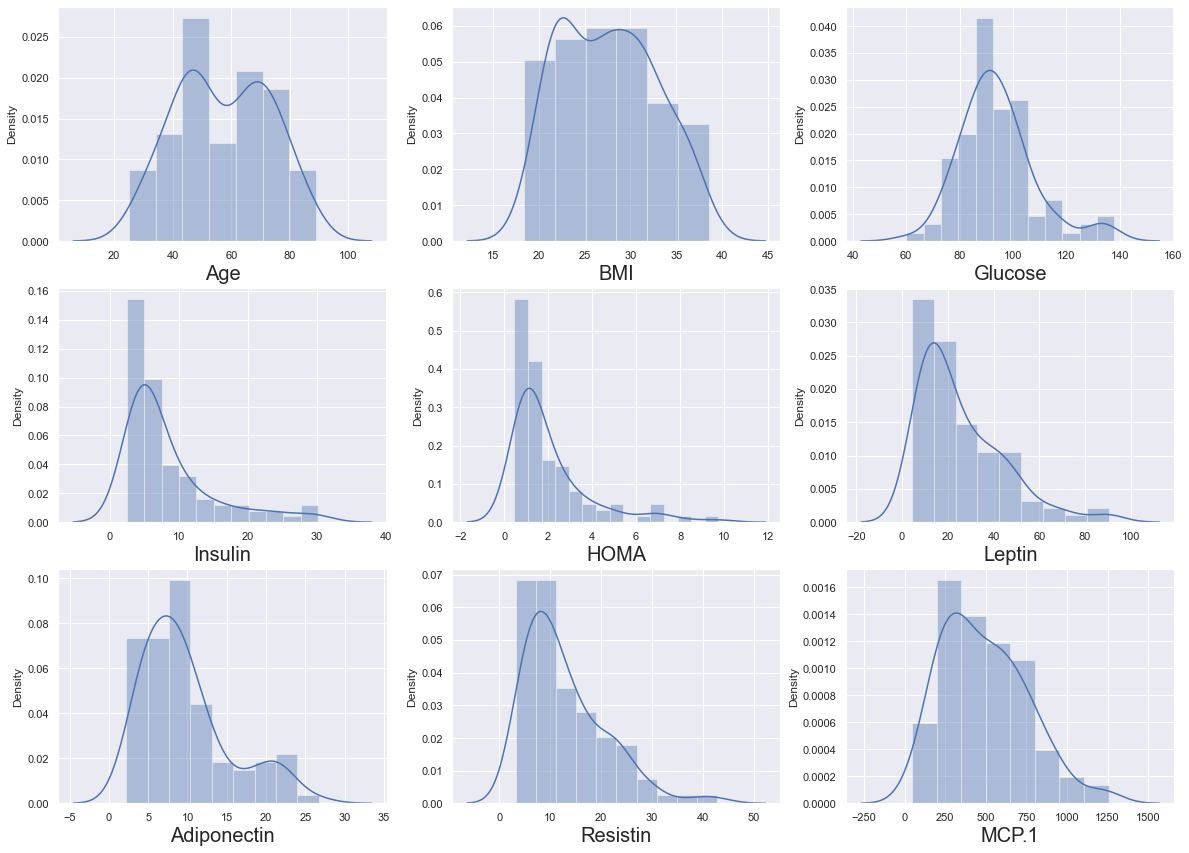

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
print(data.Classification.value_counts())

2    64
1    52
Name: Classification, dtype: int64


<AxesSubplot:xlabel='Classification', ylabel='count'>

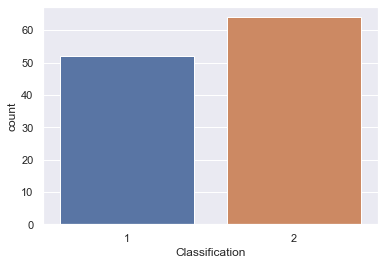

In [16]:
sns.countplot(data["Classification"])

<AxesSubplot:>

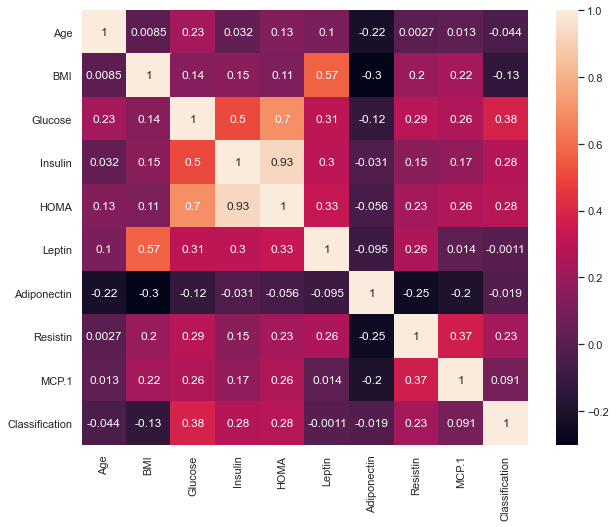

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

**Separate the Independent and Independent Features**

In [18]:
X = data.drop(columns = ["Classification"])
y = data["Classification"]

In [19]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

**Feature Scalling**

checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [22]:
X_scaled

array([[-0.57979363, -0.81667527, -1.23922225, ..., -0.07022151,
        -0.54551749, -0.34125061],
       [ 1.60182096, -1.37875056, -0.25829943, ..., -0.69734988,
        -0.86421418, -0.1912238 ],
       [ 1.53948912, -0.89176446, -0.30288683, ...,  1.79799836,
        -0.4416602 ,  0.05821407],
       ...,
       [ 0.47984774,  0.89385486, -0.03536242, ...,  1.81384272,
        -0.3563202 , -0.64049127],
       [ 0.91617066, -0.39854568, -0.70417344, ...,  3.45903808,
        -0.92857684, -0.41283214],
       [ 1.7888165 , -0.0804471 ,  1.79272102, ...,  0.57664406,
        -0.84103616, -1.29074683]])

In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.171323,Age
1,1.892076,BMI
2,2.933032,Glucose
3,12.451423,Insulin
4,18.203099,HOMA
5,1.901799,Leptin
6,1.257796,Adiponectin
7,1.349447,Resistin
8,1.401624,MCP.1


All the VIF values are less than 5 and are very low Except Insuline and HOMA. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1) 

In [25]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (92, 9)
Shape of X Test:  (24, 9)
Shape of y Train:  (92,)
Shape of y Test:  (24,)


In [26]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", (f1_score(y_test,y_pred)))
  print("Precision Score: ", (precision_score(y_test,y_pred)))
  print("Recall Score :", (recall_score(y_test,y_pred)))
  print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))

**Decision Tree**

In [27]:
ML_model(DecisionTreeClassifier())

Confusion Matrix :
  [[ 4  2]
 [ 5 13]]

Accuracy_Score:  70.833 %

F1 Score:  0.5333333333333333
Precision Score:  0.4444444444444444
Recall Score : 0.6666666666666666
AUC Score : 0.6944444444444445


Entire Report of the Model: 
               precision    recall  f1-score   support

           1       0.44      0.67      0.53         6
           2       0.87      0.72      0.79        18

    accuracy                           0.71        24
   macro avg       0.66      0.69      0.66        24
weighted avg       0.76      0.71      0.72        24



**Random Forest**

In [28]:
ML_model(RandomForestClassifier())

Confusion Matrix :
  [[ 3  3]
 [ 7 11]]

Accuracy_Score:  58.333 %

F1 Score:  0.37499999999999994
Precision Score:  0.3
Recall Score : 0.5
AUC Score : 0.5555555555555556


Entire Report of the Model: 
               precision    recall  f1-score   support

           1       0.30      0.50      0.37         6
           2       0.79      0.61      0.69        18

    accuracy                           0.58        24
   macro avg       0.54      0.56      0.53        24
weighted avg       0.66      0.58      0.61        24



**Logistic Regression**

In [29]:
ML_model(LogisticRegression())

Confusion Matrix :
  [[ 5  1]
 [ 6 12]]

Accuracy_Score:  70.833 %

F1 Score:  0.5882352941176471
Precision Score:  0.45454545454545453
Recall Score : 0.8333333333333334
AUC Score : 0.75


Entire Report of the Model: 
               precision    recall  f1-score   support

           1       0.45      0.83      0.59         6
           2       0.92      0.67      0.77        18

    accuracy                           0.71        24
   macro avg       0.69      0.75      0.68        24
weighted avg       0.81      0.71      0.73        24

